## Problem Statement


A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.api as sms


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


## Set Options

In [4]:


# display all the columns of the DataFrame
pd.options.display.max_columns = None

# display all the rows of the DataFrame
pd.options.display.max_rows = None

## Reading the data

In [6]:
df = pd.read_csv('./healthinsurance.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [7]:
df.shape
# There are 15000 records and 13 features

(15000, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [ ]:
# There are a few variables which are in wrong type
# -> Smoker is in int datatype, which must be a categorical variable
# -> Diabetes is in int datatype, which must be a categorical variable
# -> regular_ex is in int datatype, which must be a categorical variable

In [12]:
df['smoker'] = df['smoker'].astype('object')
df['diabetes'] = df['diabetes'].astype('object')
df['regular_ex'] = df['regular_ex'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  object 
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  object 
 10  regular_ex           15000 non-null  object 
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.5+ MB


In [9]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


Inferences

-> The average age of people who claim the insurance is 39 years.
-> The claim amount is between 1121 and 63770.
-> The average weight is 64.
-> The mean bmi is 30 (A healthy bmi ranges from 18.5 to 24.9)
-> The minimum blood pressure is 0.00, which is an invalid value and we need to treat it appropriately.

-> If we observe the count of the variables, we can see there is difference in the count of age and bmi variables, which indicates that there is a presence of missing value in those variables 

In [14]:
df.describe(include='object')

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


In [ ]:
# # Here we can see 
# -> top i.e. most repeated class is female, which means most of the policy holders are female with a count of 7652
# -> The majority of data is from non-smokers.
# -> Most of the policy holders are from NewOrleans.
# -> Majority of the policy holders have diabetes.


# Missing values

In [27]:
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'percent'])
missing_data

,Total,percent
bmi,956,6.373333
age,396,2.640000
sex,0,0.000000
weight,0,0.000000
hereditary_diseases,0,0.000000
no_of_dependents,0,0.000000
smoker,0,0.000000
city,0,0.000000
bloodpressure,0,0.000000
diabetes,0,0.000000


## Visualize missing values using Heatmap

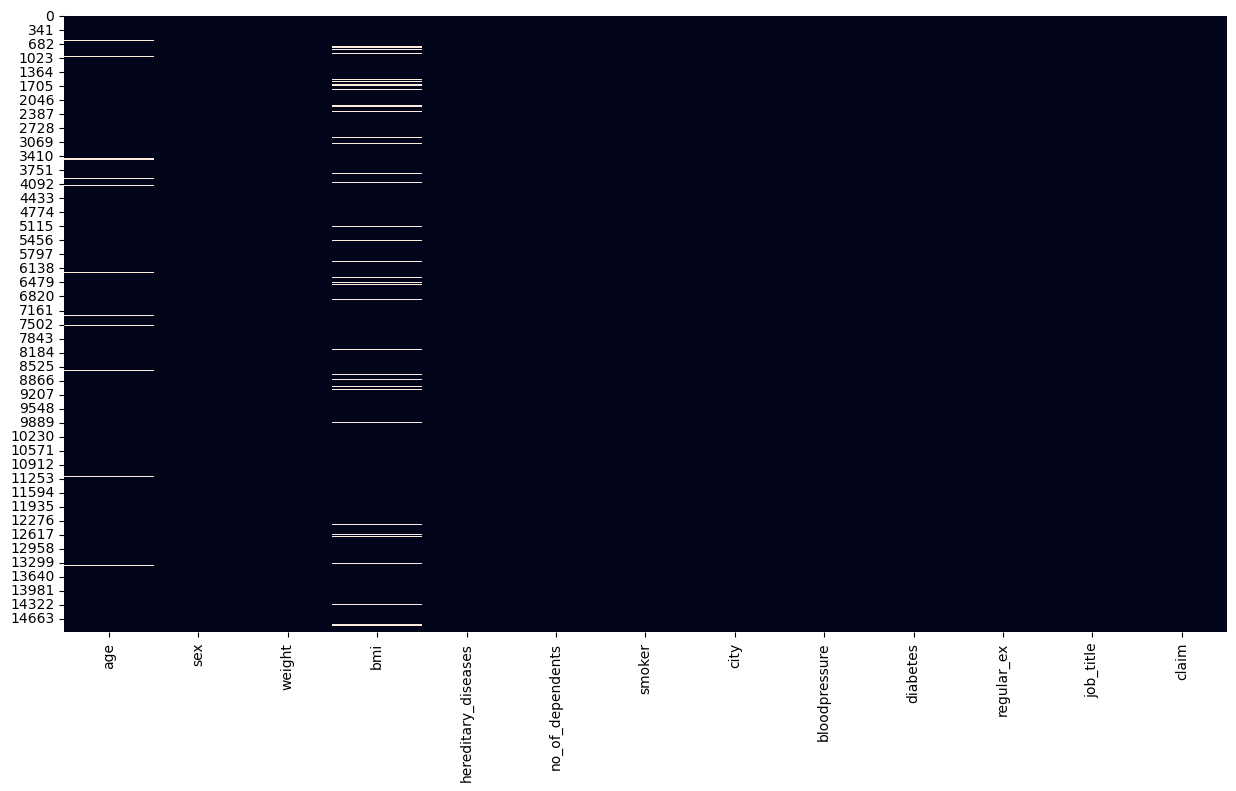

In [31]:
plt.figure(figsize=(15,8))

# cbar: It does not display the right hand side color bar.
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Imputing the missing values

In [35]:
df['age'].mean()

39.54752122706108

In [37]:
# Let us check mean of age on different genders.

df['age'].groupby(df['sex'], axis=0).mean()

sex
female    39.361040
male      39.738395
Name: age, dtype: float64

In [38]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [39]:
# Fill the bmi with the average value of the bmi.

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [40]:
# We have seen the invalid value for minimum blood pressure.
# We shall replace the 0 value with the median of blood pressure.

In [41]:
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0


In [44]:
df.bloodpressure.replace(0, df['bloodpressure'].median(), inplace=True)

In [45]:
# Now we have filled the missing values in a few variables, let's visualize the missing values using a Heatmap

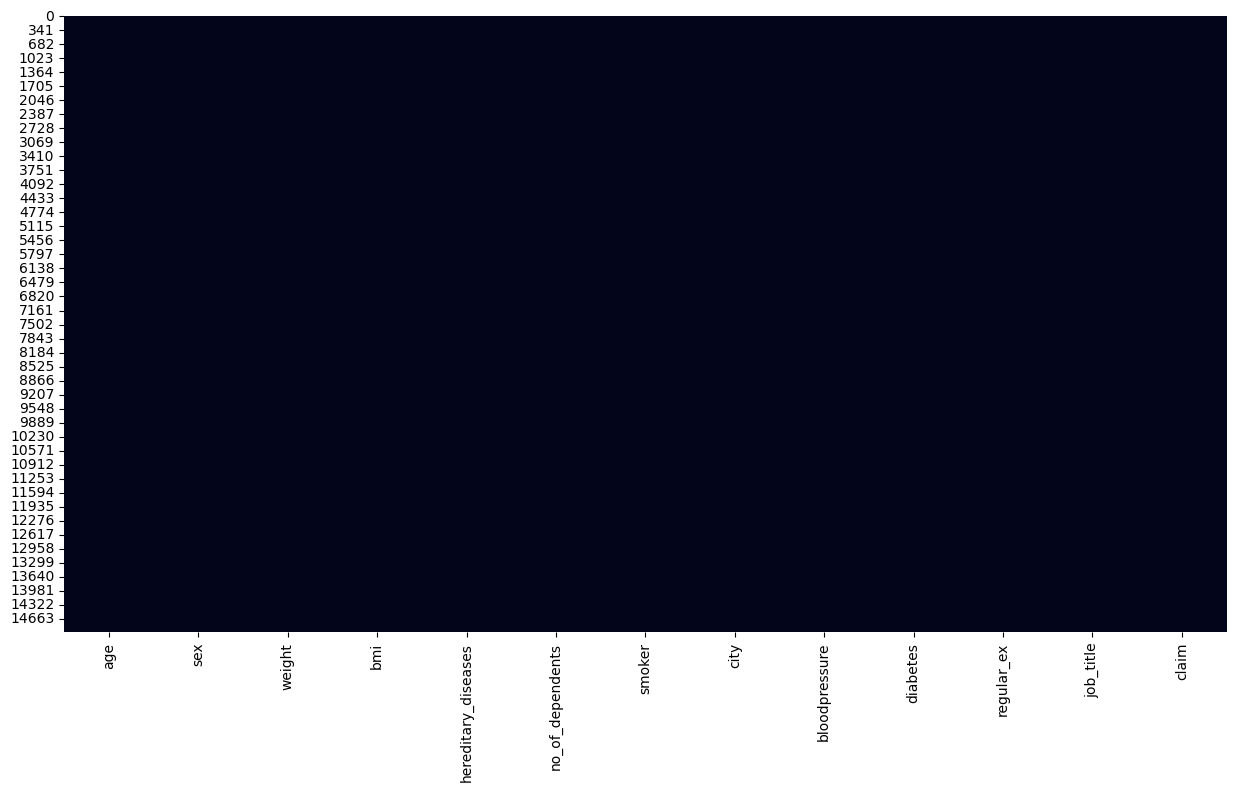

In [46]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [47]:
# Now let's check the summary statistics.

In [48]:
df.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,72.228533,13401.437620
std,13.829705,13.701935,5.924606,1.228469,11.269793,12148.239619
min,18.000000,34.000000,16.000000,0.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


In [49]:
# We can see we have successfully replaced the minimum blood pressure value from 0 to its median value.

In [ ]:
# Let's separate the numerical and categorical variables.


In [51]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include='object')

## Correlation

In [52]:
corr = num.corr()

In [ ]:
# Let's pass this correlation in the heatmap

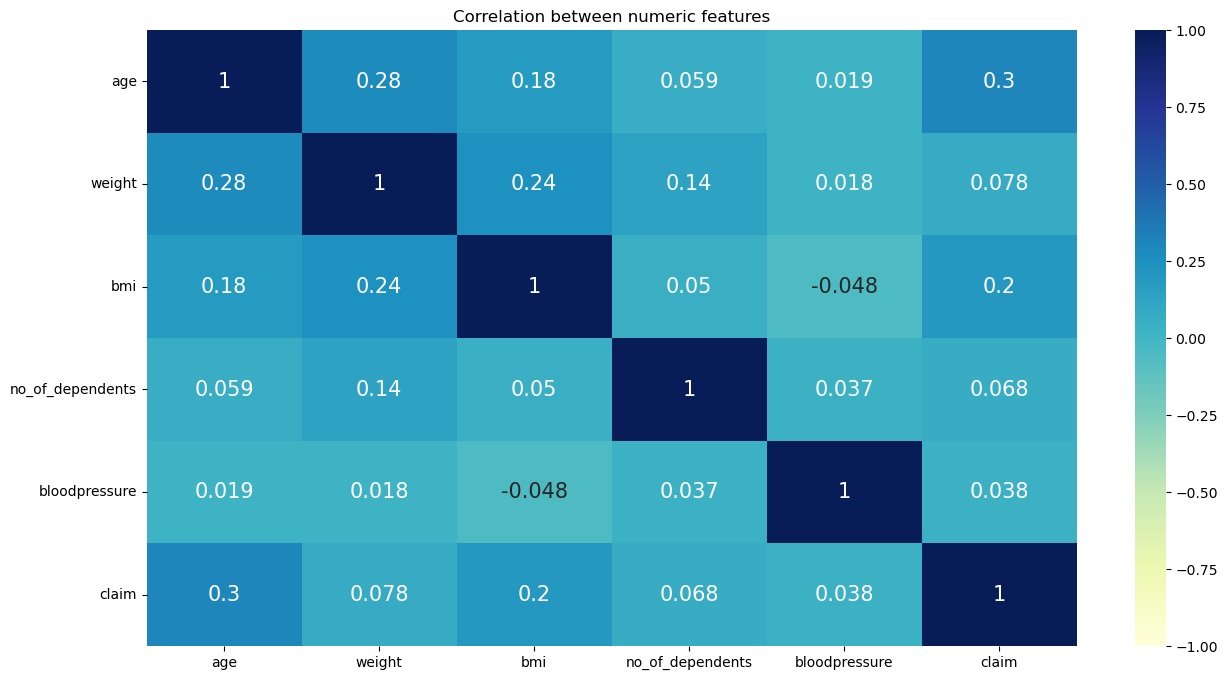

In [57]:
plt.figure(figsize=(15,8))

sns.heatmap(corr, annot=True, vmax=1.0, vmin=-1.0, cmap='YlGnBu', annot_kws={'size':15})
plt.title("Correlation between numeric features")
plt.show()

## Analyze categorical variables

In [64]:
len(df['city'].unique())

91

In [ ]:
# There are 91 cities so we shall drop the city now and we shall visualize the city seprately later.

In [65]:
cat_nocity = cat.drop('city', axis=1)

In [69]:
cat_nocity.head(3)

,sex,hereditary_diseases,smoker,diabetes,regular_ex,job_title
0,male,NoDisease,0,0,0,Actor
1,female,NoDisease,0,1,1,Engineer
2,female,Epilepsy,1,1,1,Academician


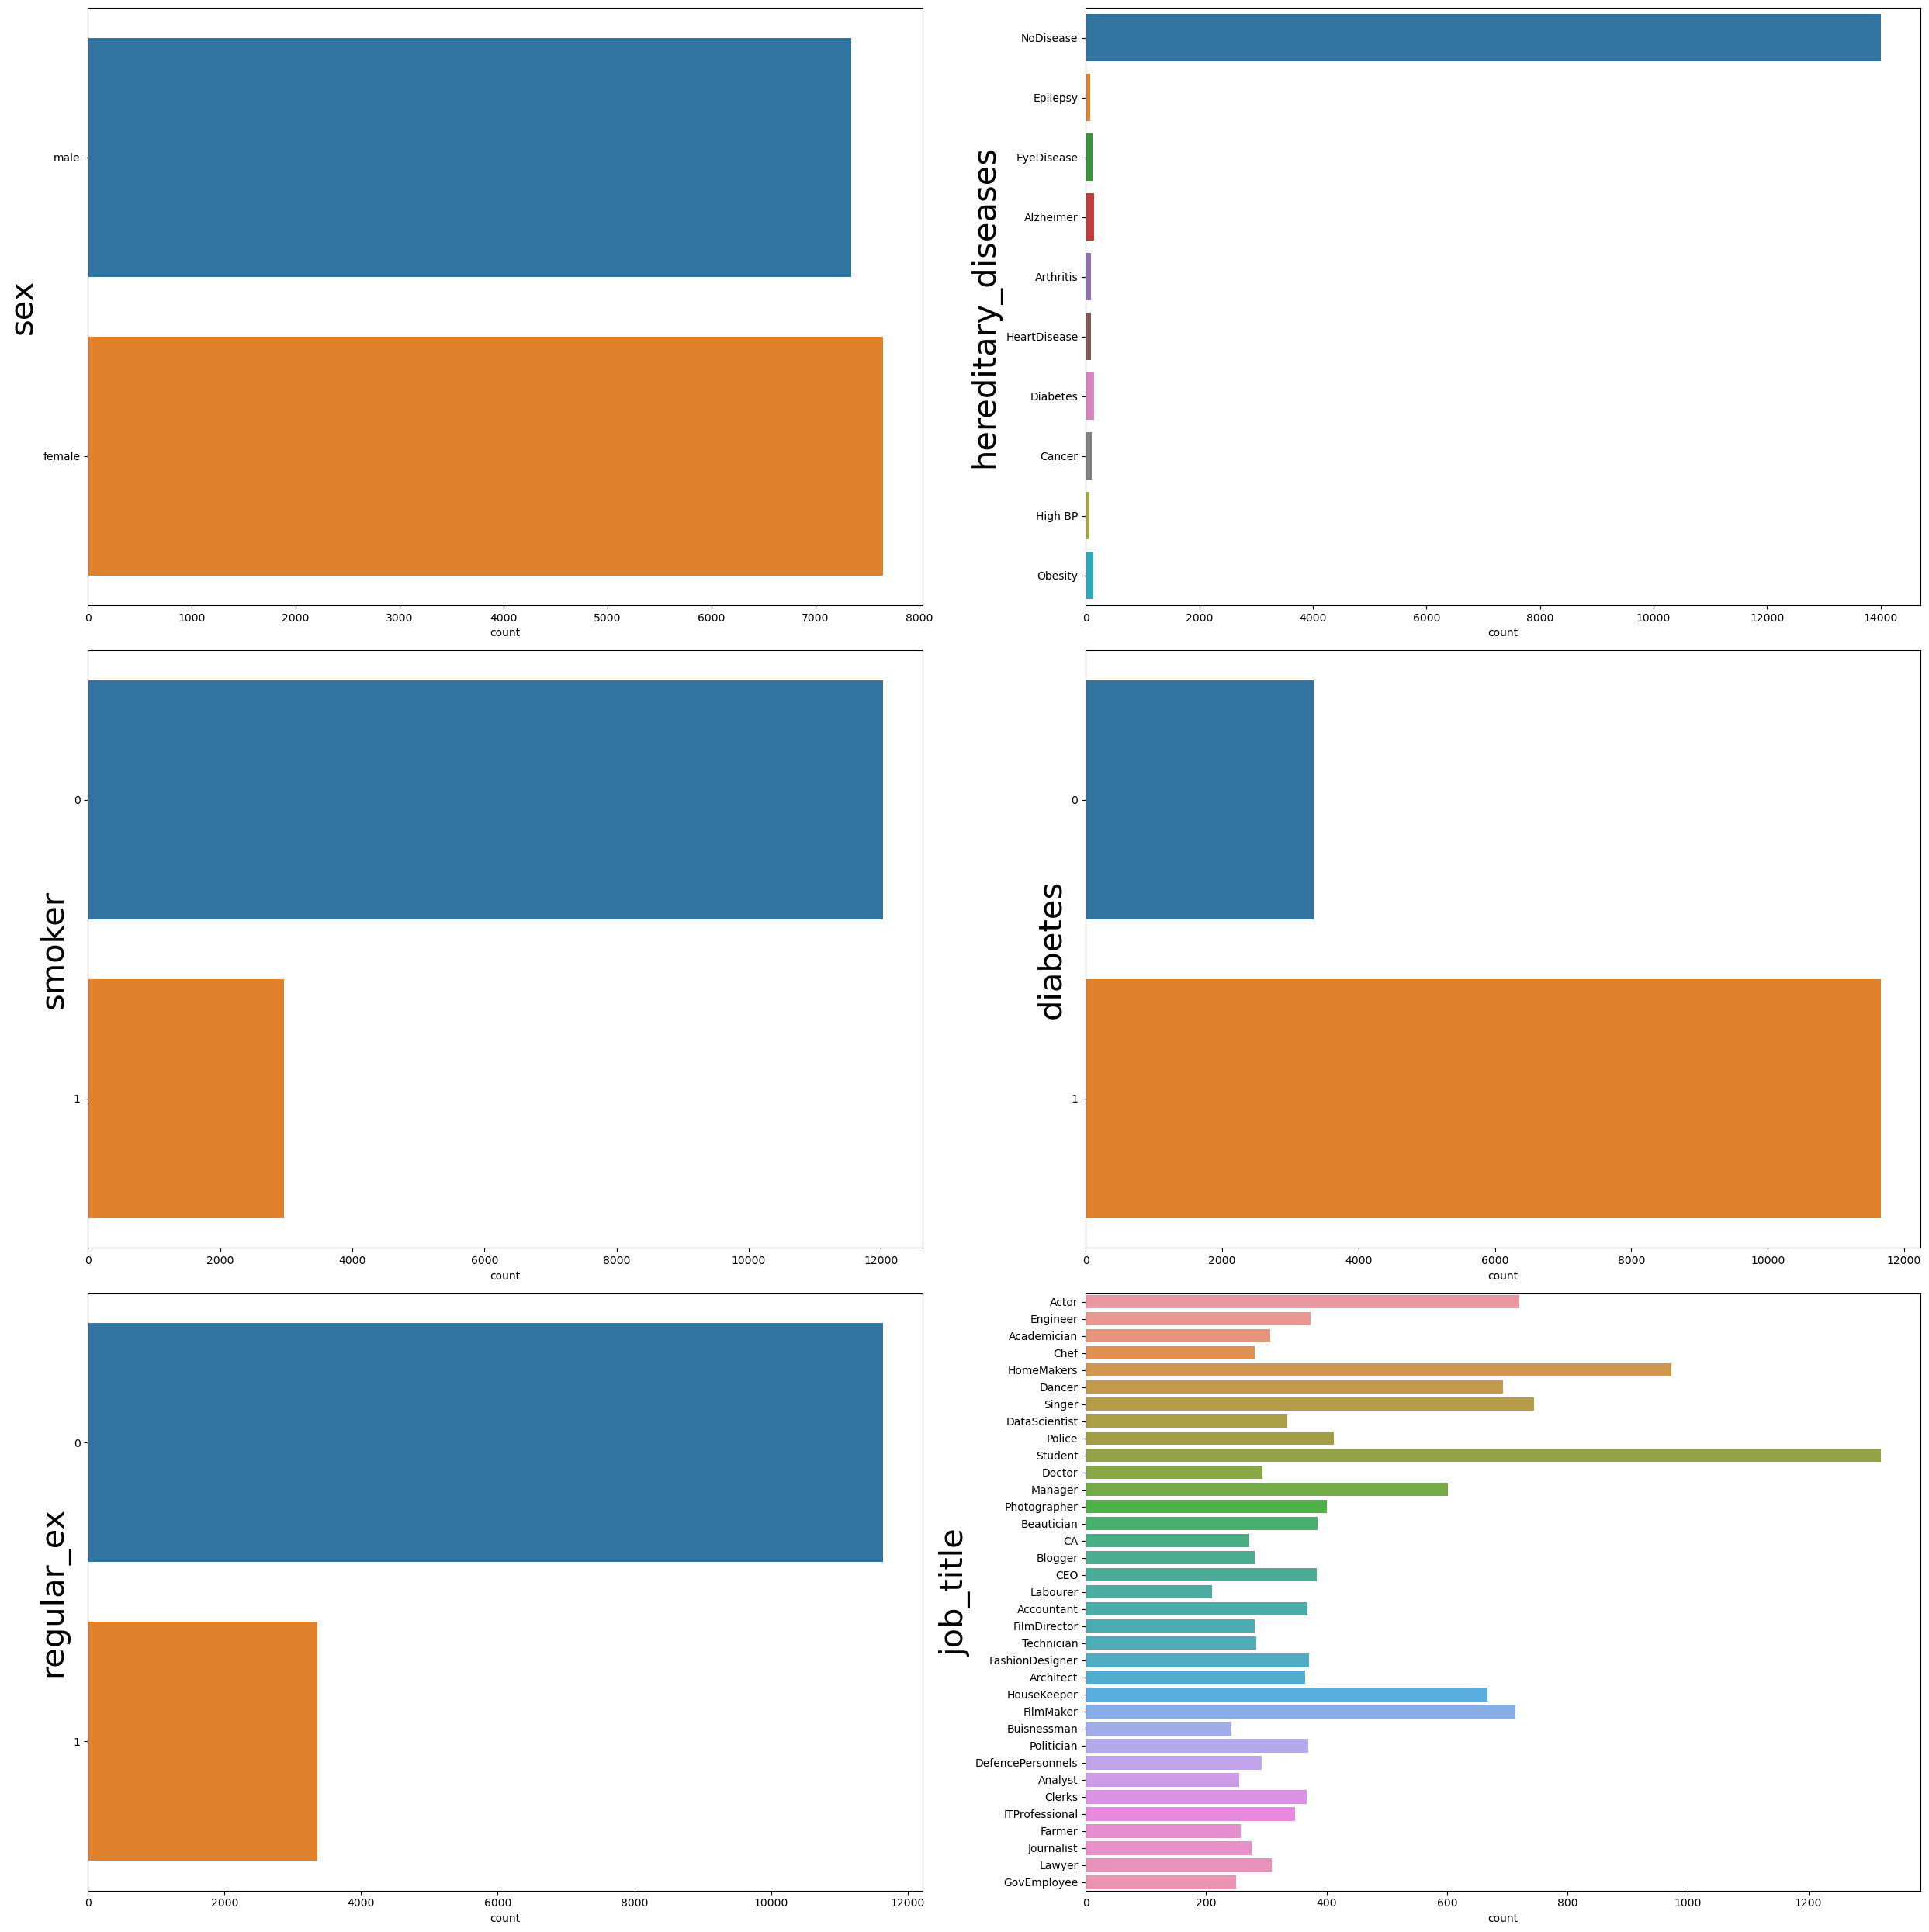

In [86]:
fig, ax  = plt.subplots(3,2, figsize=(25,25))


for var, subplots in zip(cat_nocity, ax.flatten()):
    countplot = sns.countplot(y=cat_nocity[var], ax=subplots)
    
    countplot.set_ylabel(var, fontsize=30)

    
plt.tight_layout()
plt.show()


In [ ]:
# Inferences

# -> The majority of males and females in the data is almost same.
# -> Most of the people in data have no underlined disease.
# -> Majority of people do not smoke.
# -> Majority of the people do not exercise regularly.
# -> A big portion of people have diabetes.
# -> A majority of policy holders are students.
